In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
#from gprofiler import GProfiler
#import loompy as lp
#import rpy2.rinterface_lib.callbacks
import logging
#import scrublet as scr
#from rpy2.robjects import pandas2ri
#import anndata2ri
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc
#import keras
import tensorflow as tf
from time import time                                                       
import sys

2023-02-08 15:37:37.254793: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-08 15:37:37.258456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 15:37:37.258467: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
adata = sc.read("/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8_raw.h5ad")

In [5]:
adata2 = adata.copy()

sc.pp.normalize_per_cell(adata2, counts_per_cell_after=1e4)
sc.pp.log1p(adata2)

In [6]:
adata2=desc.scale_bygroup(adata2,"TumorType")

In [7]:
save_dir="/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/Integrated"
adata2=desc.train(adata2,
        dims=[adata.shape[1],64,32],
        tol=0.001,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.3,0.4,0.5,0.6,0.7,0.8],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=30, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=True)

Start to process resolution= 0.3
The number of cpu in your computer is 48

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1


2023-02-08 15:38:54.934973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 15:38:54.941128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-08 15:38:54.941166: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-08 15:38:54.941198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (node7): /proc/driver/nvidia/version does not exist


Epoch 1/50
56/56 [==============================] - 2s 36ms/step - loss: 0.2664
Epoch 2/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2662
Epoch 3/50
56/56 [==============================] - 2s 35ms/step - loss: 0.2661
Epoch 4/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2660
Epoch 5/50
56/56 [==============================] - 2s 33ms/step - loss: 0.2660
Epoch 6/50
56/56 [==============================] - 2s 33ms/step - loss: 0.2659
Epoch 7/50
56/56 [==============================] - 2s 33ms/step - loss: 0.2658
Epoch 8/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2658
Epoch 9/50
56/56 [==============================] - 2s 33ms/step - loss: 0.2657
Epoch 10/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2657
Epoch 11/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2656
Epoch 12/50
56/56 [==============================] - 2s 34ms/step - loss: 0.2656
Epoch 13/50
56/56 [==================

56/56 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 29/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 30/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 31/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 32/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 33/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 34/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 35/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 36/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 37/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 38/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 39/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 40/50
56/56 [==============================] -

56/56 [==============================] - 1s 25ms/step - loss: 0.2606
Epoch 49/50
56/56 [==============================] - 1s 25ms/step - loss: 0.2605
Epoch 50/50
56/56 [==============================] - 1s 24ms/step - loss: 0.2605
learning rate = 0.1
Epoch 1/50
56/56 [==============================] - 2s 25ms/step - loss: 0.2605
Epoch 2/50
56/56 [==============================] - 1s 24ms/step - loss: 0.2605
Epoch 3/50
56/56 [==============================] - 1s 25ms/step - loss: 0.2605
Epoch 4/50
56/56 [==============================] - 1s 25ms/step - loss: 0.2605
Epoch 5/50
56/56 [==============================] - 1s 24ms/step - loss: 0.2604
Epoch 6/50
56/56 [==============================] - 1s 24ms/step - loss: 0.2604
Epoch 7/50
56/56 [==============================] - 1s 25ms/step - loss: 0.2604
Epoch 8/50
56/56 [==============================] - 1s 25ms/step - loss: 0.2604
Epoch 9/50
56/56 [==============================] - 1s 24ms/step - loss: 0.2604
Epoch 10/50
56/56 [==========

Epoch 2/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0995
Epoch 3/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0967
Epoch 4/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0944
Epoch 5/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0924
delta_label  0.0009189227398034919 < tol  0.001
Reached tolerance threshold. Stop training.
The final prediction cluster is:
0    3582
1    3348
2    3039
3    3071
4    1107
dtype: int64
443/443 [==============================] - 1s 2ms/step
The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 33487)]           0         
                                                                 
 encoder_0 (Dense)           (None, 64)                2143232   
                       

56/56 [==============================] - 0s 9ms/step - loss: 0.0456
Epoch 5/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0392
The value of delta_label of current 2 th iteration is 0.0837633420513183 >= tol 0.001
Epoch 1/5
56/56 [==============================] - 1s 9ms/step - loss: 0.1702
Epoch 2/5
56/56 [==============================] - 1s 9ms/step - loss: 0.1249
Epoch 3/5
56/56 [==============================] - 1s 9ms/step - loss: 0.1013
Epoch 4/5
56/56 [==============================] - 1s 9ms/step - loss: 0.0870
Epoch 5/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0775
The value of delta_label of current 3 th iteration is 0.0461581960839754 >= tol 0.001
Epoch 1/5
56/56 [==============================] - 1s 9ms/step - loss: 0.2214
Epoch 2/5
56/56 [==============================] - 1s 9ms/step - loss: 0.1756
Epoch 3/5
56/56 [==============================] - 0s 9ms/step - loss: 0.1526
Epoch 4/5
56/56 [==============================] - 0s 9ms/

56/56 [==============================] - 0s 8ms/step - loss: 0.1920
delta_label  0.0007068636460026861 < tol  0.001
Reached tolerance threshold. Stop training.
The final prediction cluster is:
0    1486
1    2017
2    1880
3    2020
4    1413
5    1732
6    1732
7    1265
8     602
dtype: int64
443/443 [==============================] - 1s 2ms/step
The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 33487)]           0         
                                                                 
 encoder_0 (Dense)           (None, 64)                2143232   
                                                                 
 encoder_1 (Dense)           (None, 32)                2080      
                                                                 
 clustering (ClusteringLayer 

56/56 [==============================] - 1s 10ms/step - loss: 0.1070
Epoch 2/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0805
Epoch 3/5
56/56 [==============================] - 0s 8ms/step - loss: 0.0656
Epoch 4/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0553
Epoch 5/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0480
The value of delta_label of current 2 th iteration is 0.09521453311656182 >= tol 0.001
Epoch 1/5
56/56 [==============================] - 0s 8ms/step - loss: 0.1928
Epoch 2/5
56/56 [==============================] - 0s 9ms/step - loss: 0.1475
Epoch 3/5
56/56 [==============================] - 0s 9ms/step - loss: 0.1229
Epoch 4/5
56/56 [==============================] - 0s 9ms/step - loss: 0.1074
Epoch 5/5
56/56 [==============================] - 0s 9ms/step - loss: 0.0967
The value of delta_label of current 3 th iteration is 0.04806672792818265 >= tol 0.001
Epoch 1/5
56/56 [==============================] - 0s 8

In [9]:
%matplotlib inline

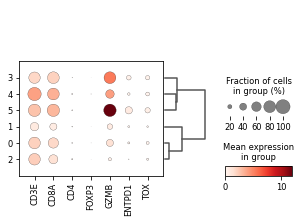

In [10]:
sc.pl.dotplot(adata2, ['CD3E','CD8A',"CD4","FOXP3","GZMB","ENTPD1","TOX"], groupby='desc_0.4', dendrogram=True)

In [19]:
adata2.obs

,CellId,CellFromTumor,PatientNumber,TumorType,TumorSite,CellType,batch,predicted_labels,majority_voting,conf_score,n_counts,desc_0.4,desc_0.5,desc_0.6,desc_0.7,desc_0.8,over_clustering,desc_0.3
barcode,,,,,,,,,,,,,,,,,,
BT1290_AAACGGGTCGGCCGAT,NaN,Tumor,Ptz1,Lung,O,T_cell,0,Tem/Trm cytotoxic T cells,Tem/Trm cytotoxic T cells,0.128875,1496.690552,1,5,4,4,4,137,2
BT1290_AAAGATGGTCGGATCC,NaN,Tumor,Ptz1,Lung,O,T_cell,0,Tem/Trm cytotoxic T cells,Tem/Trm cytotoxic T cells,0.160014,2224.338623,5,7,8,9,9,20,4
BT1290_AAAGATGGTTCGTGAT,NaN,Tumor,Ptz1,Lung,O,T_cell,0,Tem/Trm cytotoxic T cells,Tem/Trm cytotoxic T cells,0.423355,1216.467163,1,2,2,7,7,124,2
BT1290_AAAGCAACACAGTCGC,NaN,Tumor,Ptz1,Lung,O,T_cell,0,Trm cytotoxic T cells,Tem/Trm cytotoxic T cells,0.022997,1279.981079,1,5,4,4,4,212,2
BT1290_AAAGTAGAGCCCAATT,NaN,Tumor,Ptz1,Lung,O,T_cell,0,Tem/Trm cytotoxic T cells,Tem/Trm cytotoxic T cells,0.077505,1893.796631,0,5,4,4,4,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrSOL006_TTGCCGTGTGAAATCA,scrSOL006_TTGCCGTGTGAAATCA,Tumor,Ptz22,Ovarian,Ovarium,T_cell,3,Tem/Temra cytotoxic T cells,Tem/Temra cytotoxic T cells,0.113852,2743.330566,4,1,3,2,3,115,3
scrSOL006_TTGGAACAGCAAATCA,scrSOL006_TTGGAACAGCAAATCA,Tumor,Ptz22,Ovarian,Ovarium,T_cell,3,Tem/Temra cytotoxic T cells,Tem/Temra cytotoxic T cells,0.971911,2826.581543,4,1,3,2,3,115,4
scrSOL006_TTGGCAACACTTAACG,scrSOL006_TTGGCAACACTTAACG,Tumor,Ptz22,Ovarian,Ovarium,T_cell,3,Tem/Temra cytotoxic T cells,Tem/Trm cytotoxic T cells,0.578323,2057.643555,4,1,3,2,3,82,0


In [20]:
import diopy

In [22]:
adata2.write("/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8_integrated.h5ad")

In [21]:
diopy.output.write_h5(adata2, file = '/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8_integrated.h5')

In [24]:
adata2.X = adata2.layers['counts']

In [26]:
diopy.output.write_h5(adata2, file = '/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8_integrated_raw_counts.h5')